In [1]:
''''
ROADMAP
State the question and determine required data
Acquire the data in an accessible format
Identify and correct missing data points/anomalies as required
Prepare the data for the machine learning model
Establish a baseline model that you aim to exceed
Train the model on the training data
Make predictions on the test data
Compare predictions to the known test set targets and calculate performance metrics
If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
Interpret model and report results visually and numerically
'''
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

"'\nROADMAP\nState the question and determine required data\nAcquire the data in an accessible format\nIdentify and correct missing data points/anomalies as required\nPrepare the data for the machine learning model\nEstablish a baseline model that you aim to exceed\nTrain the model on the training data\nMake predictions on the test data\nCompare predictions to the known test set targets and calculate performance metrics\nIf performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique\nInterpret model and report results visually and numerically\n"

In [3]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
# Read in data and display first 5 rows
data_iz = pd.read_csv(r'D:\ACADEMIC\2020-Spring\TuGraz\Data\Combined_Izmir.csv', 
                      names=['Cooling(kWh/sqm)','Heating(kWh/sqm)','Lighting(kWh/sqm)',
                             'Equipment(kWh/sqm)','Floor Area(sqm)','Floor Number',
                             'ofPeople_service','ofPeople_living','ofPeople_bedroom',
                             'Construction_recorded','schedule_recorded','Window_Count',
                             'w_north','w_north-east','w_east','w_south-east','w_south',
                             'w_south-west','w_west','w_north-west','total_window_area',
                             'o_north','o_north-east','o_east','o_south-east','o_south',
                             'o_south-west','o_west','o_north-west'])
data_iz.head(5)

,Cooling(kWh/sqm),Heating(kWh/sqm),Lighting(kWh/sqm),Equipment(kWh/sqm),Floor Area(sqm),Floor Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,...,w_north-west,total_window_area,o_north,o_north-east,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west
0,30.12,31.16,7.02,2.38,57.88,1,0.069,0.069,0.035,0,...,0,10.38,0,0,0,0,1,1,1,0
1,17.17,19.20,12.11,2.38,52.23,1,0.180,0.180,0.090,0,...,0,12.75,0,0,0,0,0,0,0,0
2,37.07,33.79,7.21,2.38,127.95,1,0.126,0.126,0.063,0,...,0,16.72,0,1,0,0,0,0,0,0
3,29.50,37.03,12.68,2.38,110.90,1,0.075,0.075,0.037,0,...,0,8.82,0,0,0,0,0,0,0,0
4,15.90,28.61,11.38,2.38,62.66,1,0.131,0.131,0.066,0,...,0,11.68,0,0,0,1,0,0,0,0


In [4]:
#check Missing Data
print('The shape of our data_iz is:', data_iz.shape)

The shape of our features is: (2023, 29)


In [5]:
# Descriptive statistics for each column
data_iz.describe()
'''
year: 2016 for all data points
month: number for month of the year
day: number for day of the year
week: day of the week as a character string
temp_2: max temperature 2 days prior
temp_1: max temperature 1 day prior
average: historical average max temperature
actual: max temperature measurement
friend: your friend’s prediction, a random number between 20 below the average and 20 above the average
'''

'\nyear: 2016 for all data points\nmonth: number for month of the year\nday: number for day of the year\nweek: day of the week as a character string\ntemp_2: max temperature 2 days prior\ntemp_1: max temperature 1 day prior\naverage: historical average max temperature\nactual: max temperature measurement\nfriend: your friend’s prediction, a random number between 20 below the average and 20 above the average\n'

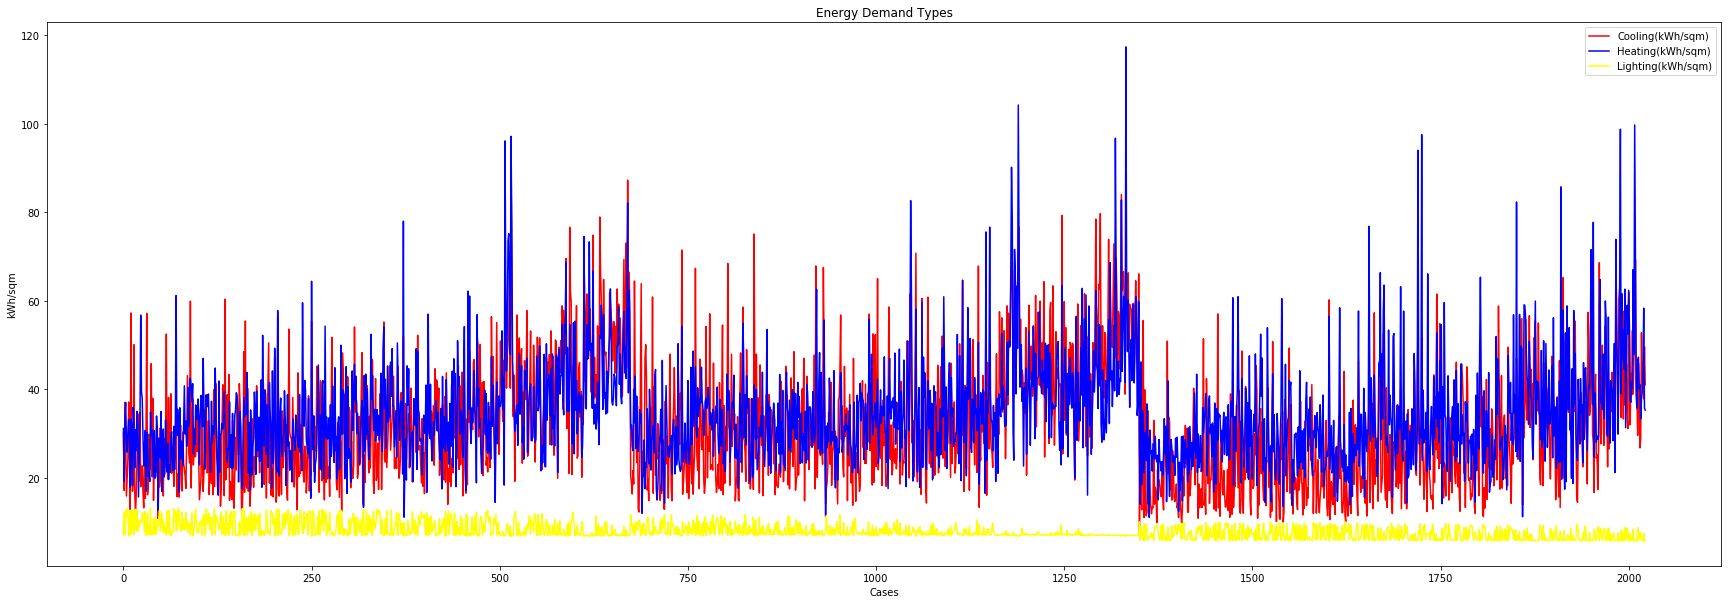

In [21]:
Cooling = data_iz['Cooling(kWh/sqm)']
Heating = data_iz['Heating(kWh/sqm)']
Lighting = data_iz['Lighting(kWh/sqm)']
data_iz['Cooling(kWh/sqm)'].plot(color='red', figsize=[30,10] )
data_iz['Heating(kWh/sqm)'].plot(color='blue')
data_iz['Lighting(kWh/sqm)'].plot(color='yellow')
plt.title('Energy Demand Types')
plt.ylabel('kWh/sqm')
plt.xlabel('Cases')
plt.legend()

In [6]:
'''
#One-Hot Encoding: transform categorical variables from text to number 
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)
'''

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [7]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [10]:
#transform data for machine learning
'''
One-hot encoded categorical variables
Split data into features and labels
Converted to arrays
Split data into training and testing sets
'''
# Establish Baseline:a sensible measure that we hope to beat with our model
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [11]:
#Import RandomForest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [12]:
#Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [13]:
#as a result the prediction %25 better than baselin (5.06, 3.87)

In [14]:
#Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


In [15]:
#Improve Model if Necessary with hypermeter tuning
'''
There are two approaches to get under the hood of the random forest: first, we can look at a single tree in the forest, 
and second, we can look at the feature importances of our explanatory variables.
'''

'\nThere are two approaches to get under the hood of the random forest: first, we can look at a single tree in the forest, \nand second, we can look at the feature importances of our explanatory variables.\n'

In [16]:
#First, visualize a single decision tree
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

"dot" with args ['-Tpng', 'C:\\Users\\orcun\\AppData\\Local\\Temp\\tmpr2d5nc6m'] returned code: 1

stdout, stderr:
 b''
b"'D:\\Program' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"



AssertionError: 1

In [17]:
#limit the depth of trees in the forest to produce an understandable image
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

"dot" with args ['-Tpng', 'C:\\Users\\orcun\\AppData\\Local\\Temp\\tmpdlnxwl93'] returned code: 1

stdout, stderr:
 b''
b"'D:\\Program' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"



AssertionError: 1

In [19]:
# VARIABLE IMPORTANCES: sort importance of variables

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [20]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


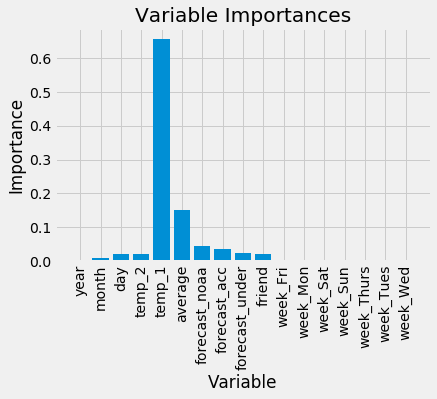

In [21]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

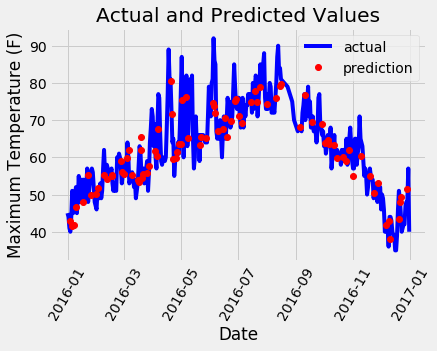

In [22]:
# Plot the entire dataset with predictions highlighted

# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

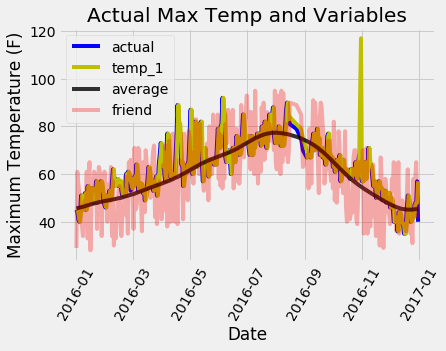

In [23]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');